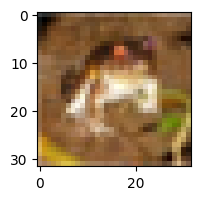

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_val, X_test = X_train/255., X_val/255., X_test/255.

X_train[0]

plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='binary' )

In [13]:
# Define model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32,32, 3]))
for index in range(1, 21):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [23]:
# Find optimal learning rate with Tensorboard
from pathlib import Path
      
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

run_index = 6 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [4]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_log

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard_cb])

Epoch 1/10
1407/1407 [==============================] - 18s 10ms/step - loss: 1.0112 - accuracy: 0.6431 - val_loss: 1.4308 - val_accuracy: 0.5260
Epoch 2/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.0068 - accuracy: 0.6452 - val_loss: 1.4338 - val_accuracy: 0.5274
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.0041 - accuracy: 0.6459 - val_loss: 1.4399 - val_accuracy: 0.5244
Epoch 4/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.0018 - accuracy: 0.6474 - val_loss: 1.4424 - val_accuracy: 0.5260
Epoch 5/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.9992 - accuracy: 0.6484 - val_loss: 1.4446 - val_accuracy: 0.5274
Epoch 6/10
1407/1407 [==============================] - 12s 9ms/step - loss: 0.9967 - accuracy: 0.6492 - val_loss: 1.4469 - val_accuracy: 0.5232
Epoch 7/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.9943 - accuracy: 0.6486 - val_loss: 1.4451 - val_a

In [25]:
# Use optimal learning rate to train model wirh Nadam optimizer and early stopping

from pathlib import Path

tf.keras.backend.clear_session()
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model", save_best_only=True)

run_index = 7 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [26]:
# Run model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/30
1403/1407 [============================>.] - ETA: 0s - loss: 1.0010 - accuracy: 0.6468

INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 24s 14ms/step - loss: 1.0012 - accuracy: 0.6466 - val_loss: 1.4656 - val_accuracy: 0.5216
Epoch 2/30
1407/1407 [==============================] - ETA: 0s - loss: 0.9912 - accuracy: 0.6504

INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 17s 12ms/step - loss: 0.9912 - accuracy: 0.6504 - val_loss: 1.4650 - val_accuracy: 0.5256
Epoch 3/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9818 - accuracy: 0.6524 - val_loss: 1.4662 - val_accuracy: 0.5256
Epoch 4/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9726 - accuracy: 0.6568 - val_loss: 1.4827 - val_accuracy: 0.5248
Epoch 5/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9608 - accuracy: 0.6610 - val_loss: 1.4971 - val_accuracy: 0.5238
Epoch 6/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9517 - accuracy: 0.6638 - val_loss: 1.5078 - val_accuracy: 0.5208
Epoch 7/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9404 - accuracy: 0.6692 - val_loss: 1.5131 - val_accuracy: 0.5162
Epoch 8/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9309 - accuracy: 0.6712 - val_loss: 1.5244 - val_accura

In [27]:
#Evaluate model on validation set
model.evaluate(X_val, y_val)

157/157 [==============================] - 0s 2ms/step - loss: 1.4650 - accuracy: 0.5256


[1.4649752378463745, 0.525600016117096]

In [29]:
# Add batch normalisation to previous model

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32,32, 3]))
for index in range(1, 21):
    model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('swish'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307200    
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10000     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

In [38]:
# Find batch normalisation optimal rate with Tensorboard
# runs = 1:1e-5, 2:3e-5, 3:5e-5, 4:1e-4, 5:3e-4
        
optimizer = tf.keras.optimizers.Nadam(learning_rate=3e-4)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

run_index = 5 # increment every time you train the model
run_logdir = Path() / "my_cifar10_bn_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)


In [39]:
# Run model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[tensorboard_cb])

Epoch 1/15
1407/1407 [==============================] - 26s 12ms/step - loss: 1.3012 - accuracy: 0.5405 - val_loss: 1.7156 - val_accuracy: 0.4222
Epoch 2/15
1407/1407 [==============================] - 16s 12ms/step - loss: 1.2903 - accuracy: 0.5444 - val_loss: 1.9018 - val_accuracy: 0.3862
Epoch 3/15
1407/1407 [==============================] - 16s 12ms/step - loss: 1.2636 - accuracy: 0.5560 - val_loss: 1.5384 - val_accuracy: 0.4688
Epoch 4/15
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2439 - accuracy: 0.5623 - val_loss: 1.6206 - val_accuracy: 0.4444
Epoch 5/15
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2214 - accuracy: 0.5726 - val_loss: 1.6403 - val_accuracy: 0.4384
Epoch 6/15
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2112 - accuracy: 0.5744 - val_loss: 1.6423 - val_accuracy: 0.4392
Epoch 7/15
1407/1407 [==============================] - 16s 12ms/step - loss: 1.1897 - accuracy: 0.5787 - val_loss: 2.0025 -

In [41]:
# Use optimal learning rate to train previous model with batch normalisation

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

run_index = 7 # increment every time you train the model
run_logdir = Path() / "my_cifar10_bn_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - ETA: 0s - loss: 0.8467 - accuracy: 0.7020

INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 34s 18ms/step - loss: 0.8467 - accuracy: 0.7020 - val_loss: 1.4063 - val_accuracy: 0.5348
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8379 - accuracy: 0.7040 - val_loss: 1.4522 - val_accuracy: 0.5282
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8317 - accuracy: 0.7077 - val_loss: 1.4536 - val_accuracy: 0.5232
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8297 - accuracy: 0.7090 - val_loss: 1.4389 - val_accuracy: 0.5298
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8236 - accuracy: 0.7075 - val_loss: 1.4290 - val_accuracy: 0.5336
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8244 - accuracy: 0.7069 - val_loss: 1.4581 - val_accuracy: 0.5272
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8117 - accuracy: 0.7142 - val_loss: 1.4500 - val_

In [42]:
model.evaluate(X_val, y_val)

157/157 [==============================] - 1s 3ms/step - loss: 1.4063 - accuracy: 0.5348


[1.4063448905944824, 0.5347999930381775]